In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from sklearn.cluster import KMeans

In [8]:
df=pd.read_csv('D:/interns/New Folder/deathcases.csv')

In [9]:
df['Age']=df['Age'].astype(int)

In [10]:
X=df[['Age', 'Days Admitted']].copy()

In [84]:
wcss=[]

In [85]:
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [45]:
sns.set()

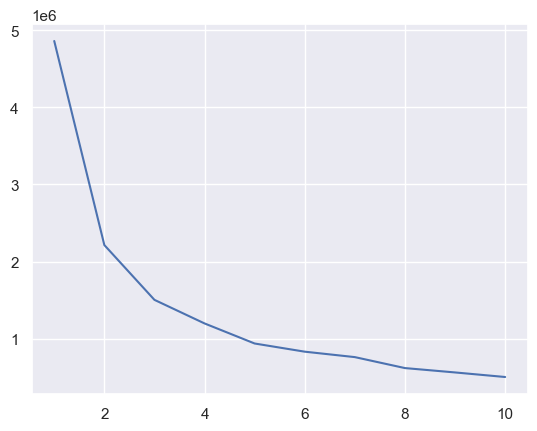

In [46]:
plt.plot(range(1, 11), wcss)

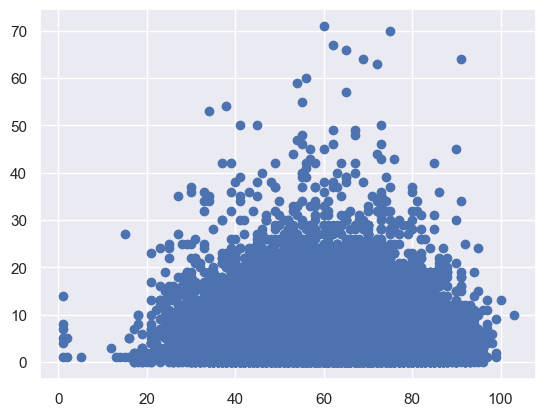

In [47]:
plt.scatter(X['Age'], X['Days Admitted'])

In [110]:
from sklearn.mixture import GaussianMixture

In [111]:
n_clusters=5

In [112]:
gmm=GaussianMixture(n_components=n_clusters)

In [113]:
gmm.fit(X)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=5)

In [114]:
cluster_labels=gmm.predict(X)

In [126]:
X=pd.DataFrame(X[:100])

In [116]:
X['cluster']=cluster_labels

In [25]:
color=['Green', 'Red', 'Blue', 'Pink', 'Yellow', 'Black']

(34, 3)
(16, 3)
(14, 3)
(31, 3)
(5, 3)


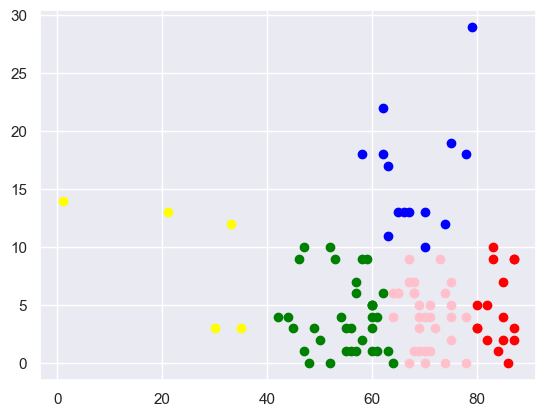

In [118]:
for k in range(0, n_clusters):
    data=X[X['cluster']==k]
    print(data.shape)
    plt.scatter(data['Age'], data['Days Admitted'], c=color[k])

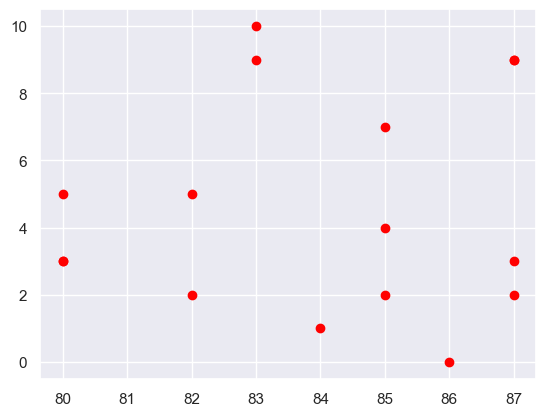

In [119]:
data=X[X['cluster']==1]
plt.scatter(data['Age'], data['Days Admitted'], c=color[1])

In [120]:
from sklearn.cluster import SpectralClustering

In [122]:
scm=SpectralClustering(
    n_clusters=5,
    random_state=10,
    n_neighbors=8,
    affinity='nearest_neighbors')

In [127]:
X['cluster']=scm.fit_predict(X[['Age', 'Days Admitted']])

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


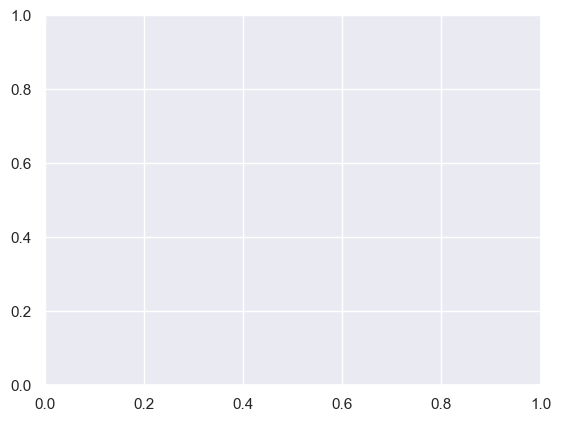

In [128]:
fig, ax=plt.subplots()

<Axes: xlabel='Age', ylabel='Days Admitted'>

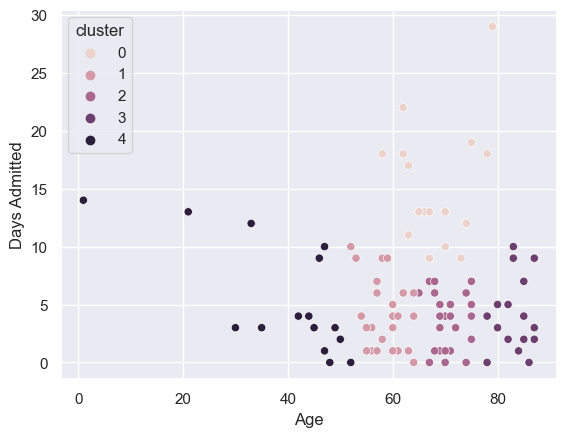

In [133]:
sns.scatterplot(x='Age', y='Days Admitted', data=X, hue='cluster')

In [131]:
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2208\89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [11]:
import numpy as np

In [101]:
X=np.array(df['Age'].copy()).reshape(-1, 1)

In [75]:
X

array([[63],
       [53],
       [74],
       ...,
       [34],
       [75],
       [64]])

In [76]:
wcss=[]

In [77]:
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [78]:
sns.set()

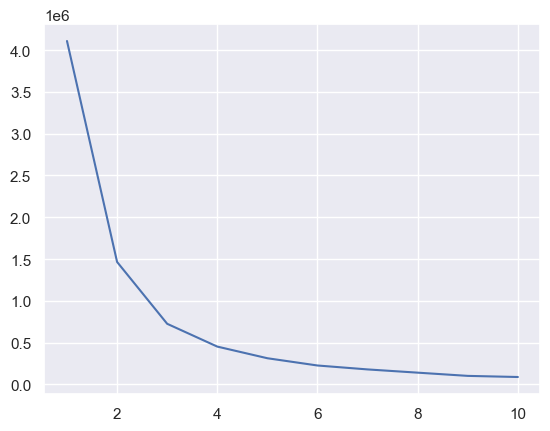

In [79]:
plt.plot(range(1, 11), wcss)

In [99]:
kmeans=KMeans(n_clusters=4, random_state=0, n_init='auto')

In [102]:
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [103]:
cluster_labels=kmeans.predict(X)

In [104]:
X=pd.DataFrame(X)

In [105]:
X.columns

RangeIndex(start=0, stop=1, step=1)

In [106]:
X['cluster']=cluster_labels

(100, 2)
<class 'pandas.core.series.Series'>
(100, 2)
<class 'pandas.core.series.Series'>
(100, 2)
<class 'pandas.core.series.Series'>
(100, 2)
<class 'pandas.core.series.Series'>


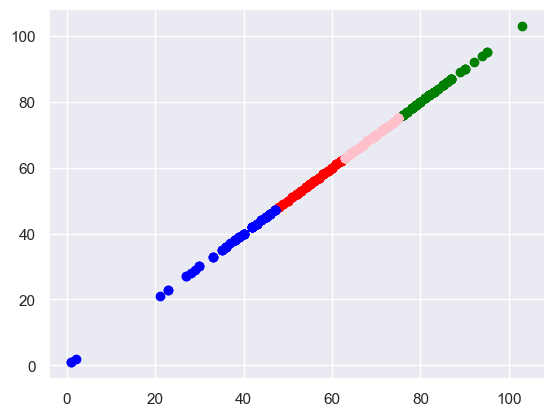

In [107]:
for k in range(0, 4):
    data=X[X['cluster']==k][:100]
    print(data.shape)
    print(type(data[0]))
    #pd.Series.plot(style='o')
    #data[0].plot(style='o', color=color[k])
    plt.scatter(data[0], data[0], c=color[k])

In [108]:
data=X[X['cluster']==0]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    3253.000000
mean       81.794036
std         4.499693
min        76.000000
25%        78.000000
50%        81.000000
75%        85.000000
max       103.000000
Name: 0, dtype: float64

In [109]:
data=X[X['cluster']==1]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    7350.000000
mean       55.949388
std         4.184628
min        48.000000
25%        53.000000
50%        56.000000
75%        60.000000
max        62.000000
Name: 0, dtype: float64

In [110]:
data=X[X['cluster']==2]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    3374.000000
mean       39.253705
std         6.581038
min         1.000000
25%        36.000000
50%        40.000000
75%        45.000000
max        47.000000
Name: 0, dtype: float64

In [111]:
data=X[X['cluster']==3]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    7876.000000
mean       68.833418
std         3.768498
min        63.000000
25%        65.000000
50%        69.000000
75%        72.000000
max        75.000000
Name: 0, dtype: float64

In [112]:
df['Age'].corr(df['Days Admitted'])

-0.018234860440234636

In [113]:
cluster_labels.size

21853

In [114]:
df.shape

(21853, 11)

In [115]:
df['cluster_labels'] = cluster_labels

In [116]:
df

,Patient No,Age,Gender,District,Admit Date,Death Date,Symptoms,Cause,File Date,Days Admitted,cluster_labels
0,12124,63,Male,Chennai,14-12-2020,31-12-2020,"Complaints of Fever,Cough and Difficulty in Br...",COVID -19 Pneumonia,01-01-2021,17,3
1,12125,53,Male,Ramnathapuram,22-12-2020,31-12-2020,Complaints of Fever for 6 days Cough and Dyspn...,COVID -19 Pneumonia,01-01-2021,9,1
2,12126,74,Male,Salem,19-12-2020,31-12-2020,"Complaints of Fever,Cough for 5 days Difficult...",ARDS/COVID -19 Pneumonia,01-01-2021,12,3
3,12127,71,Male,Chennai,30-12-2020,31-12-2020,Complaints of Difficulty in Breathing for 4 da...,ARDS/COVID -19 Pneumonia,01-01-2021,1,3
4,12128,74,Male,Thanjavur,24-12-2020,30-12-2020,"Complaints of Fever,Cough for 6 days",COVID -19 Pneumonia,01-01-2021,6,3
...,...,...,...,...,...,...,...,...,...,...,...
21848,36767,75,Male,Salem,29-12-2021,30-12-2021,Type2Diabetes Mellitus/Systemic Hypertension,COVID -19 Pneumonia,31-12-2021,1,3
21849,36769,52,Male,Coimbatore,29-11-2021,29-12-2021,PLWHA,COVID -19 Pneum onia,31-12-2021,30,1
21850,36770,34,Male,Coimbatore,27-12-2021,28-12-2021,Type2Diabetes Mellitus,COVID -19 Pneumonia,31-12-2021,1,2
21851,36771,75,Male,Coimbatore,17-12-2021,30-12-2021,Type2Diabetes Mellitus/ Coronary Artery Diseas...,COVID -19 Pneumonia,31-12-2021,13,3


In [117]:
df.to_csv('D:/interns/New Folder/deathcases.csv')

In [ ]:
for k in range(0, 4):
    data=X[X['cluster']==k]
    print(data.shape)
    print(type(data[0]))
    #pd.Series.plot(style='o')
    #data[0].plot(style='o', color=color[k])
    data[0].plot()

In [ ]:
df['Age'].plot(kind='kde')

In [125]:
from sklearn.cluster import DBSCAN

In [153]:
X=np.array(df['Age'].copy()).reshape(-1, 1)

In [154]:
X

array([[63],
       [53],
       [74],
       ...,
       [34],
       [75],
       [64]])

In [120]:
wcss=[]

In [121]:
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [122]:
sns.set()

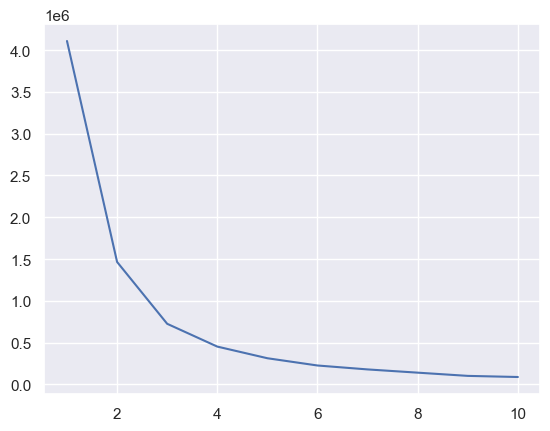

In [123]:
plt.plot(range(1, 11), wcss)

In [144]:
dbscan=DBSCAN(eps=0.25, min_samples=10).fit(X)

In [145]:
core_samples_mask=np.zeros_like(dbscan.labels_, dtype=bool)

In [146]:
core_samples_mask[dbscan.core_sample_indices_]=True

In [147]:
cluster_labels=dbscan.labels_

In [148]:
unique_labels = set(cluster_labels)

In [149]:
colors = ['y', 'b', 'g', 'r']

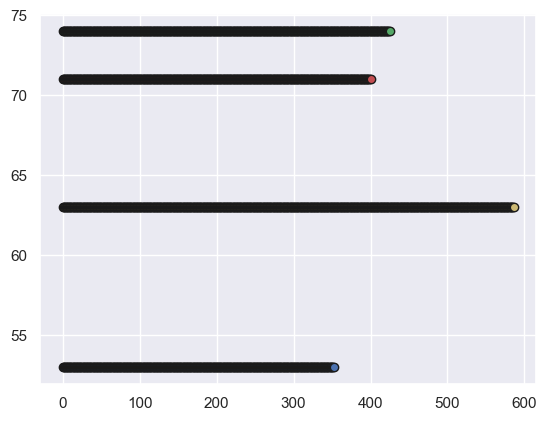

In [152]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (cluster_labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

(100, 2)
<class 'pandas.core.series.Series'>
(100, 2)
<class 'pandas.core.series.Series'>
(100, 2)
<class 'pandas.core.series.Series'>
(100, 2)
<class 'pandas.core.series.Series'>


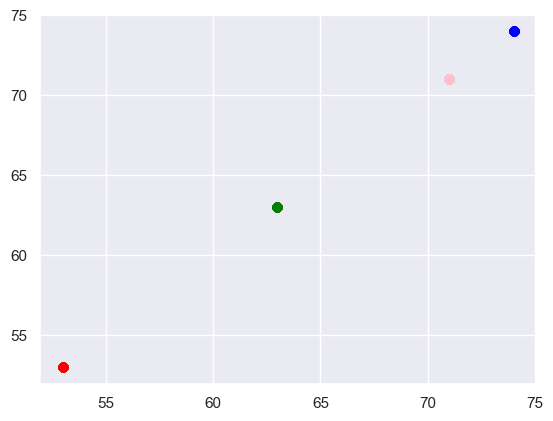

In [108]:
data=X[X['cluster']==0]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    3253.000000
mean       81.794036
std         4.499693
min        76.000000
25%        78.000000
50%        81.000000
75%        85.000000
max       103.000000
Name: 0, dtype: float64

In [109]:
data=X[X['cluster']==1]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    7350.000000
mean       55.949388
std         4.184628
min        48.000000
25%        53.000000
50%        56.000000
75%        60.000000
max        62.000000
Name: 0, dtype: float64

In [110]:
data=X[X['cluster']==2]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    3374.000000
mean       39.253705
std         6.581038
min         1.000000
25%        36.000000
50%        40.000000
75%        45.000000
max        47.000000
Name: 0, dtype: float64

In [111]:
data=X[X['cluster']==3]
#plt.scatter(range(100), data[0], c=color[1])
data[0].describe()

count    7876.000000
mean       68.833418
std         3.768498
min        63.000000
25%        65.000000
50%        69.000000
75%        72.000000
max        75.000000
Name: 0, dtype: float64

In [112]:
df['Age'].corr(df['Days Admitted'])

-0.018234860440234636

In [113]:
cluster_labels.size

21853

In [114]:
df.shape

(21853, 11)

In [115]:
df['cluster_labels'] = cluster_labels

In [116]:
df

,Patient No,Age,Gender,District,Admit Date,Death Date,Symptoms,Cause,File Date,Days Admitted,cluster_labels
0,12124,63,Male,Chennai,14-12-2020,31-12-2020,"Complaints of Fever,Cough and Difficulty in Br...",COVID -19 Pneumonia,01-01-2021,17,3
1,12125,53,Male,Ramnathapuram,22-12-2020,31-12-2020,Complaints of Fever for 6 days Cough and Dyspn...,COVID -19 Pneumonia,01-01-2021,9,1
2,12126,74,Male,Salem,19-12-2020,31-12-2020,"Complaints of Fever,Cough for 5 days Difficult...",ARDS/COVID -19 Pneumonia,01-01-2021,12,3
3,12127,71,Male,Chennai,30-12-2020,31-12-2020,Complaints of Difficulty in Breathing for 4 da...,ARDS/COVID -19 Pneumonia,01-01-2021,1,3
4,12128,74,Male,Thanjavur,24-12-2020,30-12-2020,"Complaints of Fever,Cough for 6 days",COVID -19 Pneumonia,01-01-2021,6,3
...,...,...,...,...,...,...,...,...,...,...,...
21848,36767,75,Male,Salem,29-12-2021,30-12-2021,Type2Diabetes Mellitus/Systemic Hypertension,COVID -19 Pneumonia,31-12-2021,1,3
21849,36769,52,Male,Coimbatore,29-11-2021,29-12-2021,PLWHA,COVID -19 Pneum onia,31-12-2021,30,1
21850,36770,34,Male,Coimbatore,27-12-2021,28-12-2021,Type2Diabetes Mellitus,COVID -19 Pneumonia,31-12-2021,1,2
21851,36771,75,Male,Coimbatore,17-12-2021,30-12-2021,Type2Diabetes Mellitus/ Coronary Artery Diseas...,COVID -19 Pneumonia,31-12-2021,13,3


In [165]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(core_samples_mask)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    print(xy)
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
	#		markeredgecolor='k',
	#		markersize=6)

	#xy = X[class_member_mask & ~core_samples_mask]
	#plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
	#		markeredgecolor='k',
	#		markersize=6)

    #plt.title('number of clusters: %d' % n_clusters_)
    #plt.show()
    


[ True  True  True ...  True  True  True]
['y', 'b', 'g', 'r']
[[63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 [63]
 

In [256]:
X2=np.array(df[['Age', 'Days Admitted']].copy()).reshape(-1, 1)

In [257]:
db = DBSCAN(eps=5, min_samples=10).fit(X2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(core_samples_mask)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)
    xy = X2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()
    



KeyboardInterrupt



In [334]:
X=df.iloc[:, [1, 9]].values[:1000]

In [352]:
from sklearn.datasets import make_blobs

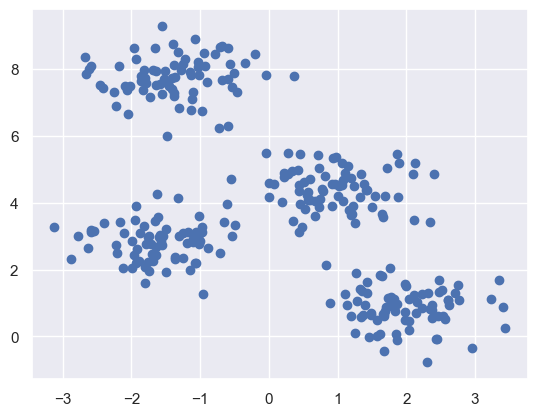

In [379]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [354]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [355]:
from sklearn.neighbors import NearestNeighbors

In [356]:
neigh=NearestNeighbors(n_neighbors=2)

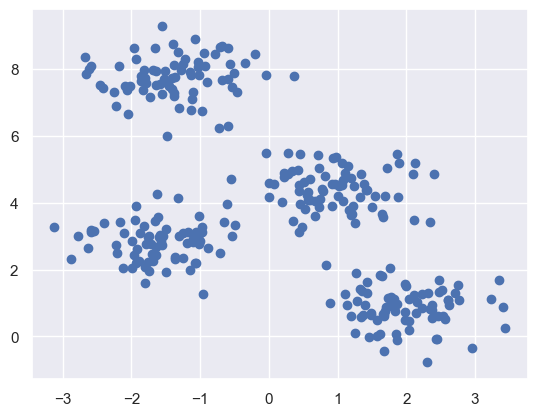

In [357]:
plt.scatter(X[:, 0], X[:, 1])

In [358]:
nbrs=neigh.fit(X)

In [359]:
distances, indices=nbrs.kneighbors(X)

In [360]:
distances

array([[0.        , 0.49822928],
       [0.        , 0.08829225],
       [0.        , 0.12019666],
       [0.        , 0.11049628],
       [0.        , 0.31064694],
       [0.        , 0.61124146],
       [0.        , 0.35774854],
       [0.        , 0.01966341],
       [0.        , 0.29733787],
       [0.        , 0.03349706],
       [0.        , 0.08393989],
       [0.        , 0.28828177],
       [0.        , 0.14403194],
       [0.        , 0.3005636 ],
       [0.        , 0.12156709],
       [0.        , 0.1666952 ],
       [0.        , 0.02207558],
       [0.        , 0.11856671],
       [0.        , 0.07770645],
       [0.        , 0.01593125],
       [0.        , 0.20980317],
       [0.        , 0.06166964],
       [0.        , 0.26472336],
       [0.        , 0.22898617],
       [0.        , 0.17967984],
       [0.        , 0.56539061],
       [0.        , 0.09434692],
       [0.        , 0.11509095],
       [0.        , 0.40987856],
       [0.        , 0.23293743],
       [0.

In [361]:
distances=np.sort(distances, axis=0)

In [362]:
distances=distances[:, 1]

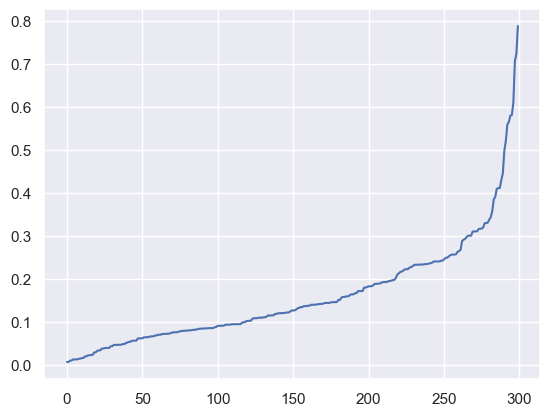

In [363]:
plt.plot(distances)

In [376]:
dbs=DBSCAN(eps=0.35, min_samples=10)

In [380]:
model=dbs.fit(X)

In [381]:
labels=model.labels_

In [382]:
print(labels)

[-1  0 -1  0 -1 -1 -1  2 -1 -1  1 -1  2 -1 -1  2  2 -1  1 -1 -1  3 -1  1
  1 -1  3 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1  1  3 -1  1 -1 -1  1  1  0  1
  0 -1  1  3 -1  3 -1  1 -1 -1  0  3 -1  2 -1  1  1  1 -1  3 -1  1  2 -1
  0  1 -1 -1  1  2  3  0 -1  2 -1  3 -1 -1  3 -1 -1  0  2  3 -1  1  1 -1
 -1  3 -1 -1 -1 -1 -1  3  2  3 -1  2 -1 -1 -1  1  3 -1  3 -1  0 -1 -1 -1
 -1  3 -1  3 -1  3  3  1 -1  1 -1  1  1 -1  0 -1 -1  0 -1 -1 -1  1 -1 -1
 -1  1  0 -1  0  0  0  2 -1 -1 -1  1  0  1  3  2 -1  2  2 -1  2 -1 -1 -1
 -1 -1  2  0  3 -1 -1  0 -1  3  2  1  3 -1  1  1 -1  2 -1  2 -1  0 -1  1
  2  2  1  1 -1 -1  1  0 -1  1 -1  1 -1 -1  1 -1  2 -1  2  1 -1 -1  0 -1
  1  3 -1  2  0  3  3 -1 -1 -1 -1 -1  0 -1  2 -1  2 -1  1  2  3  1 -1  1
 -1 -1 -1  0  0  0  0  1  1 -1 -1  1  3  2  1 -1 -1 -1  3  0  2 -1 -1  3
 -1  1 -1 -1 -1  3  3 -1  1 -1 -1 -1 -1 -1  0  0 -1  3 -1  3  3 -1  0 -1
 -1  2 -1  3 -1 -1  0 -1 -1  2 -1  1]


In [270]:
df['dblabels']=labels

In [272]:
df.to_csv('D:/interns/New Folder/deathcases.csv')

In [239]:
sample_cores=np.zeros_like(labels, dtype=bool)

In [240]:
dbs.core_sample_indices_

array([    0,     1,     2, ..., 21850, 21851, 21852], dtype=int64)

In [241]:
sample_cores[dbs.core_sample_indices_]=True

In [372]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)

In [383]:
X=pd.DataFrame(X)

In [384]:
X['dblabel']=labels

In [385]:
print(n_clusters)

8


In [386]:
color=['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red',
       'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna']

(35, 3)
<class 'pandas.core.series.Series'>
(50, 3)
<class 'pandas.core.series.Series'>
(32, 3)
<class 'pandas.core.series.Series'>
(37, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>


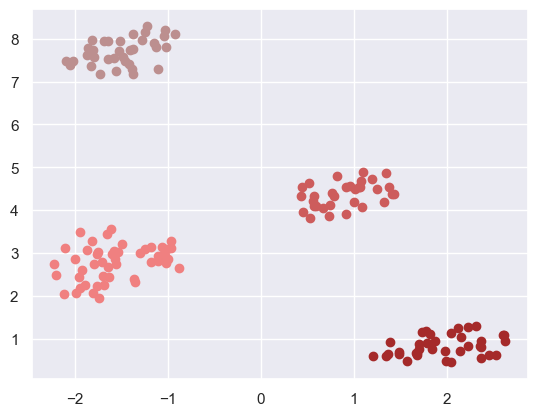

In [387]:
for k in range(0, 8):
    data=X[X['dblabel']==k]
    print(data.shape)
    print(type(data[0]))
    #pd.Series.plot(style='o')
    #data[0].plot(style='o', color=color[k])
    plt.scatter(data[0], data[1], c=color[k])

In [458]:
X=df.iloc[:, [1, 9]].values

In [459]:
X

array([[63, 17],
       [53,  9],
       [74, 12],
       ...,
       [34,  1],
       [75, 13],
       [64,  0]], dtype=int64)

In [460]:
X=np.unique(X, axis=0)

In [461]:
X

array([[  1,   1],
       [  1,   4],
       [  1,   5],
       ...,
       [ 99,   9],
       [100,  13],
       [103,  10]], dtype=int64)

In [462]:
from sklearn.neighbors import NearestNeighbors

In [463]:
neigh=NearestNeighbors(n_neighbors=2)

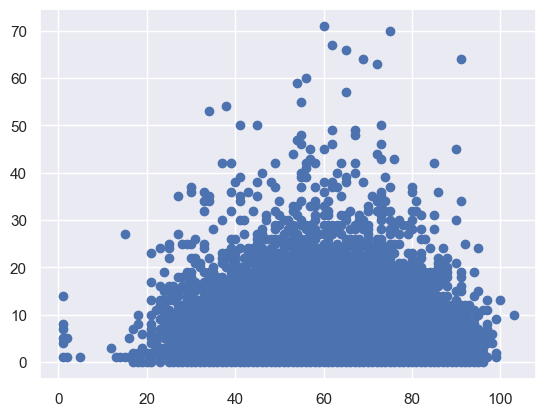

In [464]:
plt.scatter(X[:, 0], X[:, 1])

In [465]:
nbrs=neigh.fit(X)

In [466]:
distances, indices=nbrs.kneighbors(X)

In [467]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 2.23606798],
       [0.        , 3.        ],
       [0.        , 4.12310563]])

In [468]:
distances=np.sort(distances, axis=0)

In [469]:
distances=distances[:, 1]

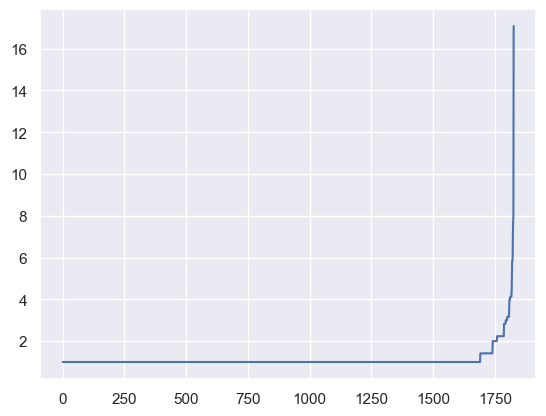

In [470]:
plt.plot(distances)

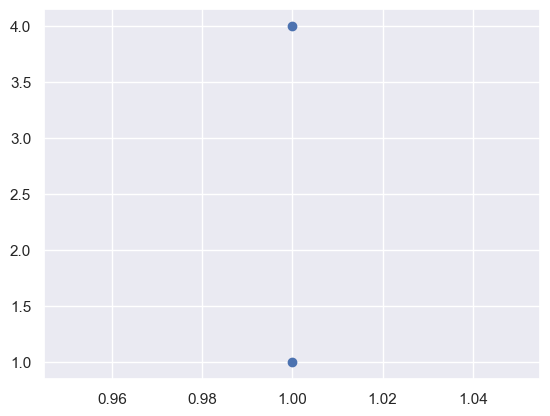

In [451]:
plt.scatter(X[:][0], X[:][1])

In [474]:
dbs=DBSCAN(eps=2.2, min_samples=10)

model=dbs.fit(X)

labels=model.labels_

print(len(set(labels))-1)

3


In [475]:
X=pd.DataFrame(X)

In [476]:
X['dblabel']=labels

(1500, 3)
<class 'pandas.core.series.Series'>
(7, 3)
<class 'pandas.core.series.Series'>
(9, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>
(0, 3)
<class 'pandas.core.series.Series'>


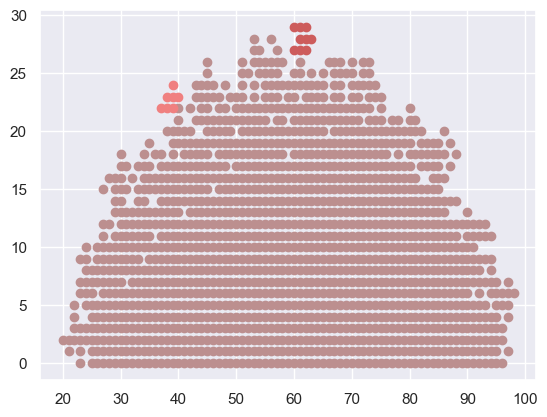

In [478]:
for k in range(0, 8):
    data=X[X['dblabel']==k]
    print(data.shape)
    print(type(data[0]))
    #pd.Series.plot(style='o')
    #data[0].plot(style='o', color=color[k])
    plt.scatter(data[0], data[1], c=color[k])